<font size="5">**Module 2 Mini-Project**</font>

<font size="4">**Credit risk**</font>

In [2]:
import pandas as pd

df = pd.read_csv('dataset_31_credit-g.csv')

In [6]:
df.head(3)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good


In [4]:
df.shape

(1000, 21)

**Does the dataset include any missing value? If so, drop them!**

In [8]:
df.dropna()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


In [9]:
from sklearn.preprocessing import LabelEncoder
df["class"] = LabelEncoder().fit_transform(df["class"])

In [10]:
df.head(3)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,1
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,0
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,1


<AxesSubplot: >

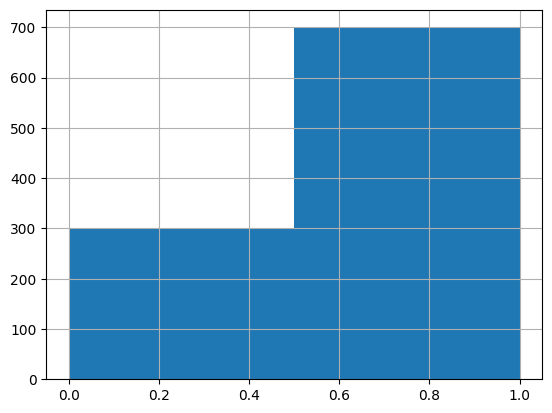

In [12]:
import matplotlib.pyplot as plt
df["class"].hist(bins=2)

C:\Users\angel\AppData\Local\Temp\ipykernel_10916\3187984343.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

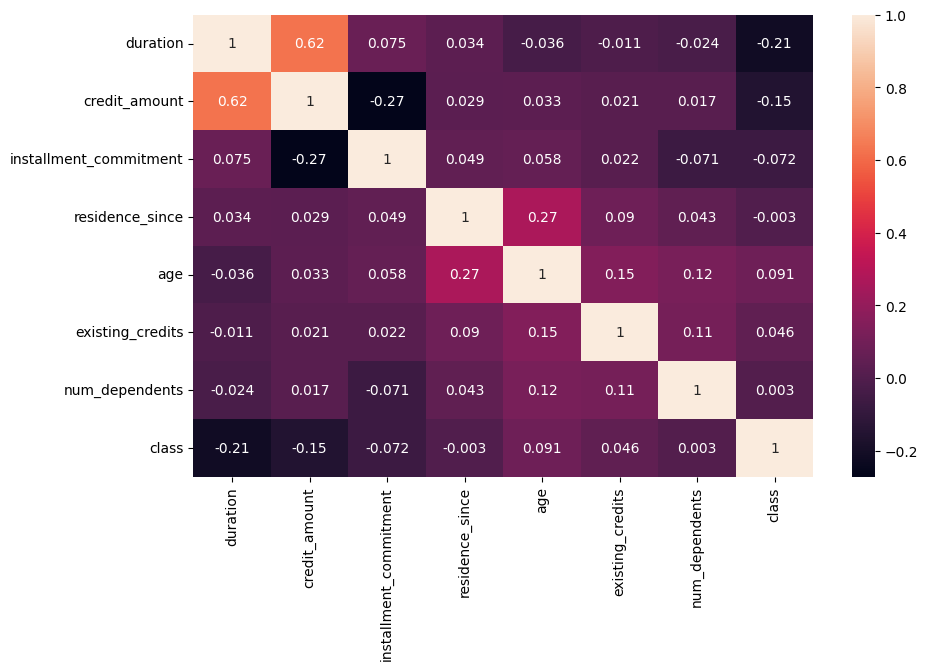

In [13]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

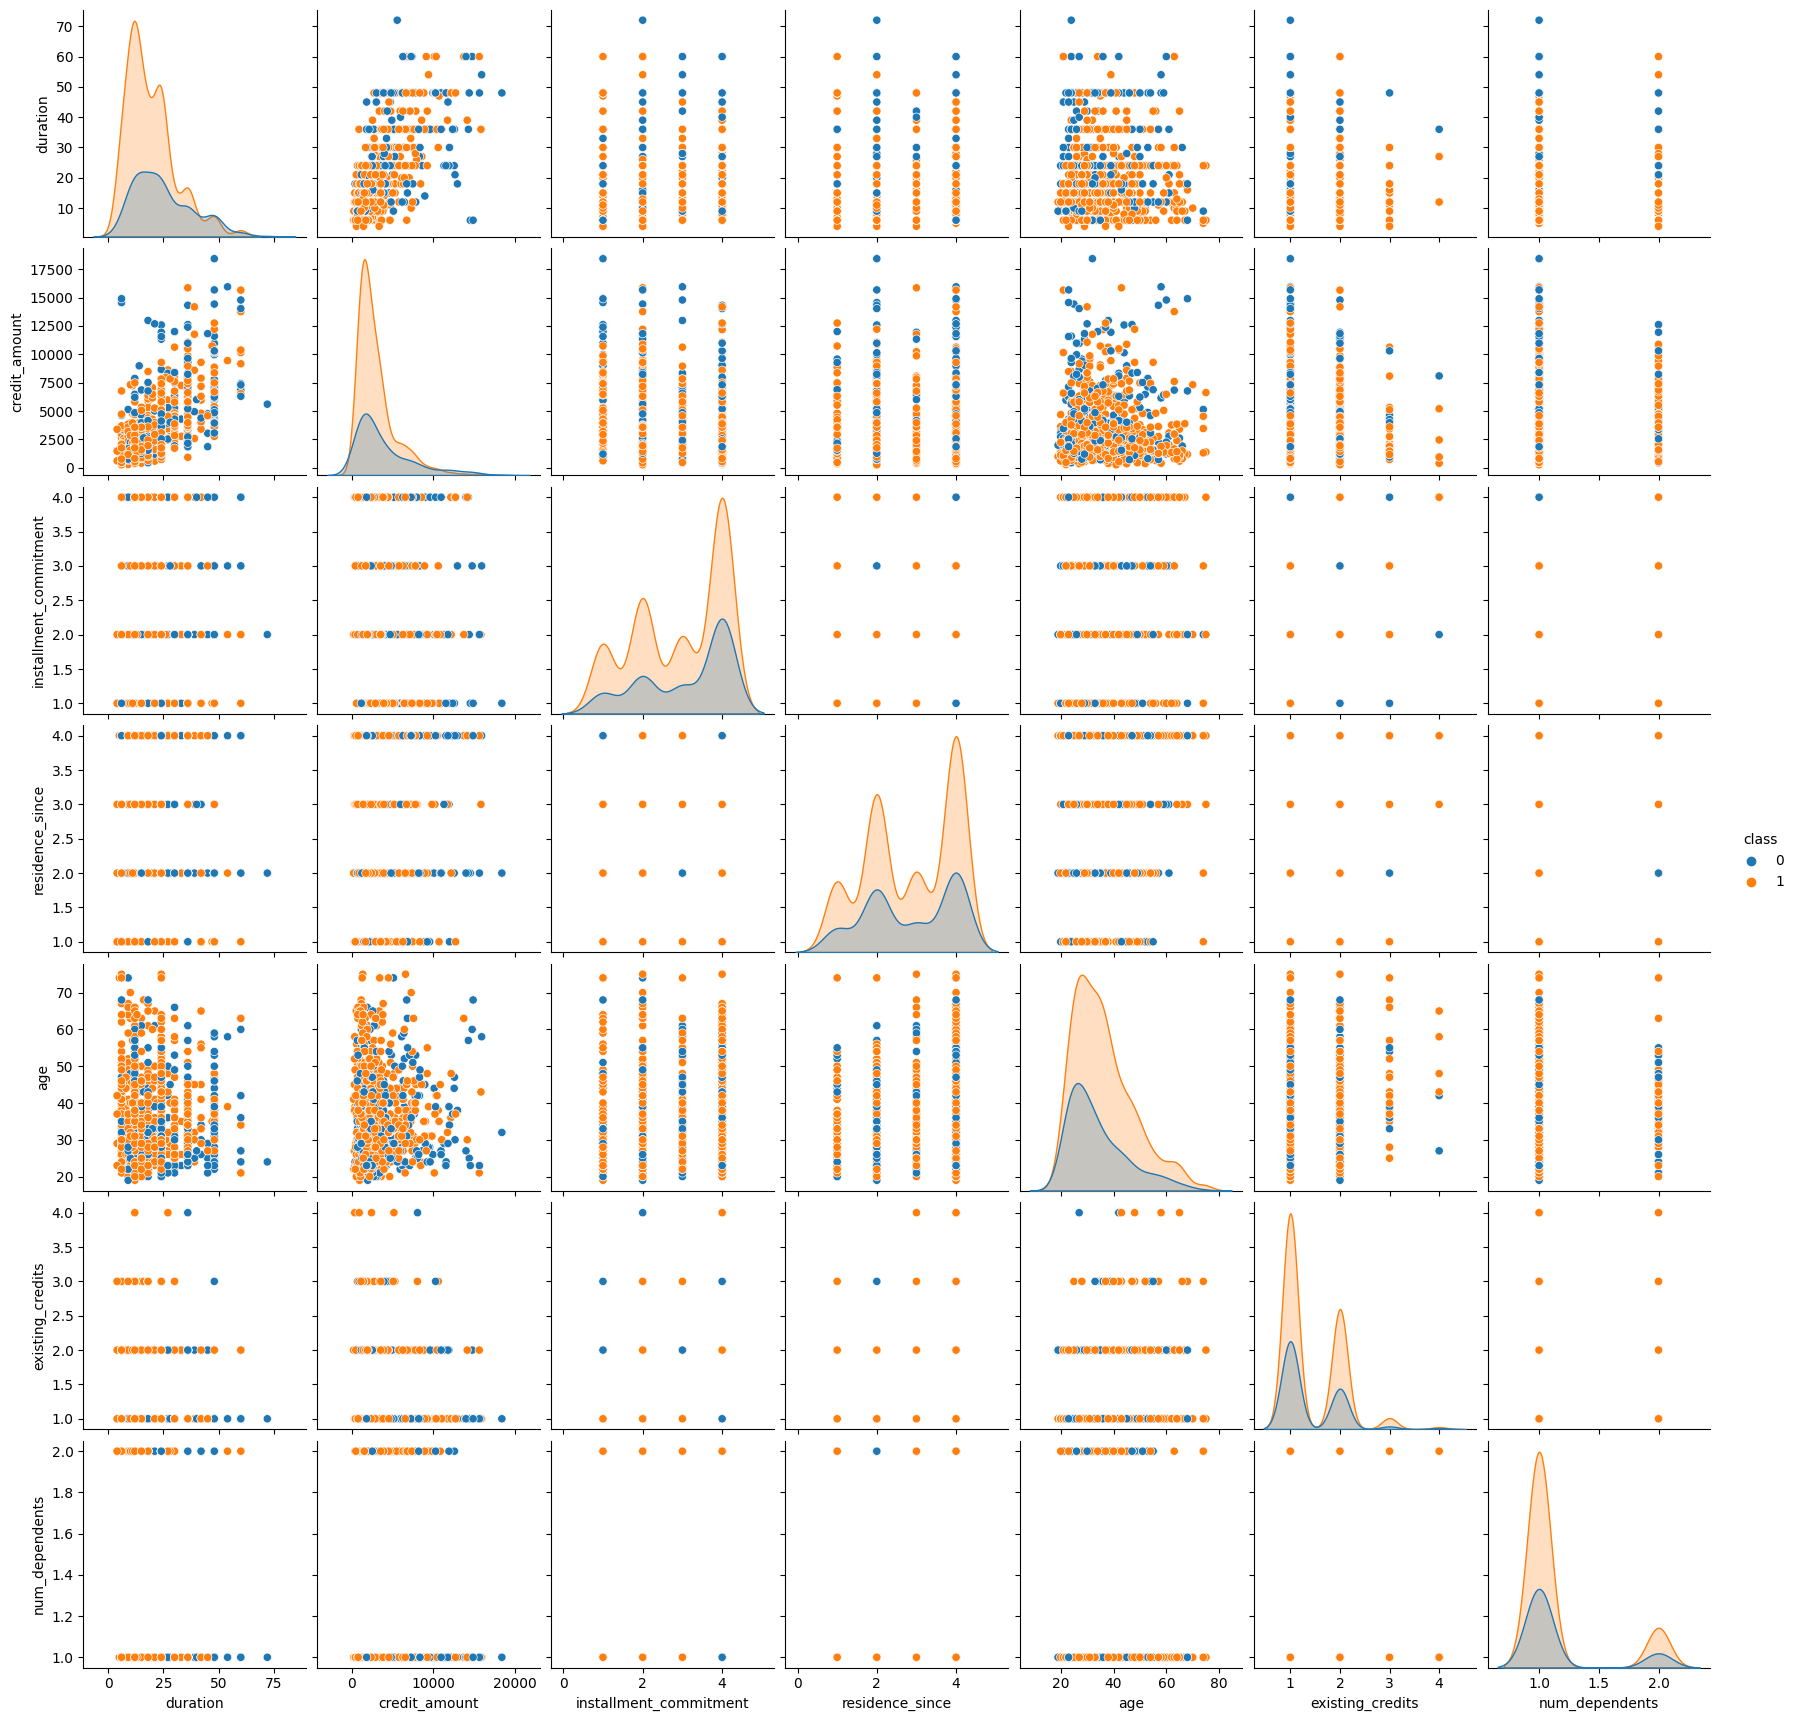

In [14]:
sns.pairplot(df, hue="class")

In [16]:
nominal = df[["credit_amount", "age", "existing_credits", "num_dependents"]]
categorical = df[["credit_history", "purpose", "housing", "job"]]

In [17]:
categorical

,credit_history,purpose,housing,job
0,critical/other existing credit,radio/tv,own,skilled
1,existing paid,radio/tv,own,skilled
2,critical/other existing credit,education,own,unskilled resident
3,existing paid,furniture/equipment,for free,skilled
4,delayed previously,new car,for free,skilled
...,...,...,...,...
995,existing paid,furniture/equipment,own,unskilled resident
996,existing paid,used car,own,high qualif/self emp/mgmt
997,existing paid,radio/tv,own,skilled
998,existing paid,radio/tv,for free,skilled


In [20]:
categorical = pd.get_dummies(categorical)

In [21]:
categorical

,credit_history_all paid,credit_history_critical/other existing credit,credit_history_delayed previously,credit_history_existing paid,credit_history_no credits/all paid,purpose_business,purpose_domestic appliance,purpose_education,purpose_furniture/equipment,purpose_new car,...,purpose_repairs,purpose_retraining,purpose_used car,housing_for free,housing_own,housing_rent,job_high qualif/self emp/mgmt,job_skilled,job_unemp/unskilled non res,job_unskilled resident
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
996,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
997,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
998,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [22]:
credit = pd.concat([nominal, categorical], axis=1)

In [24]:
y = df["class"].values

x_columns = len(credit.columns)

x = credit.iloc[:, 0:x_columns].values

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [26]:
X_validate, X_test, y_validate, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [27]:
print(len(X_train), len(X_test), len(X_validate))

800 100 100


In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
knn.score(X_test, y_test)

0.64

In [30]:
scores = []
neighbors = range(1,20)

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    results = knn.score(X_test, y_test)
    scores.append(results)

print(scores)

[0.59, 0.53, 0.64, 0.56, 0.68, 0.67, 0.66, 0.58, 0.65, 0.65, 0.65, 0.65, 0.69, 0.63, 0.67, 0.65, 0.66, 0.66, 0.67]


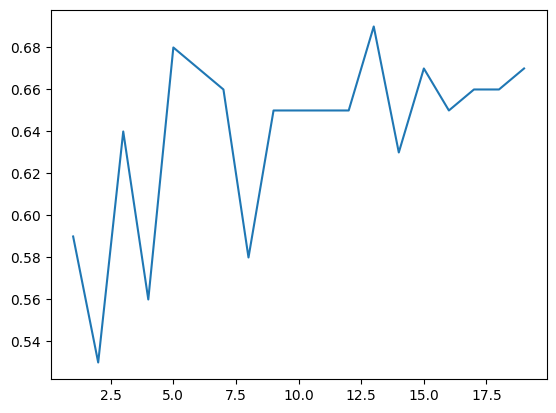

In [31]:
plt.plot(neighbors,scores)

In [32]:
knn = KNeighborsClassifier(n_neighbors=13).fit(X_train, y_train)

In [33]:
result = knn.score(X_validate, y_validate)
print("Accuracy =", result)

Accuracy = 0.75


In [34]:
from sklearn.metrics import confusion_matrix

predictions = knn.predict(X_validate)

print("Confusion Matrix: \n", confusion_matrix(y_validate, predictions))

Confusion Matrix: 
 [[ 8 21]
 [ 4 67]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier